## División de cursos mediante Algoritmos Genéticos

 **Contexto:**
En una escuela secundaria, 60 alumnos pasaron exitosamente el curso de ingreso.Ahora deben ser asignados a 3 cursos de 20 alumnos cada uno. Cada alumno eligió dos compañeros con quienes le gustaría estar en el mismo curso.


**Objetivo:**
Construir una asignacion que maximice la utilidad total del grupo.

**Reglas:**
- Cada curso debe tener exactamente 20 alumnos.
- Cada alumno debe pertenecer a un único curso.

**Definiciones de utilidad (fitness):**
- +1 punto por cada amigo elegido que este en el mismo curso (Osea + 2 si los 2 amigos están en el mismo curso)
- -3 puntos si los dos amigos terminan juntos en otro curso.
- -1 punto si el alumno y sus dos amigos terminan todos en cursos distintos.

In [23]:
# Listado de alumnos y sus preferencias
alumnos_amigos = {
    'Ana': ['Bruno', 'Camila'], 'Bruno': ['Ana', 'Diego'], 'Camila': ['Bruno', 'Elena'],
    'Diego': ['Camila', 'Francisco'], 'Elena': ['Diego', 'Gabriela'], 'Francisco': ['Elena', 'Hugo'],
    'Gabriela': ['Francisco', 'Isabel'], 'Hugo': ['Gabriela', 'Juan'], 'Isabel': ['Hugo', 'Karla'],
    'Juan': ['Isabel', 'Leonardo'], 'Karla': ['Juan', 'Mariana'], 'Leonardo': ['Karla', 'Nicolas'],
    'Mariana': ['Leonardo', 'Olivia'], 'Nicolas': ['Mariana', 'Pablo'], 'Olivia': ['Nicolas', 'Raul'],
    'Pablo': ['Olivia', 'Sofia'], 'Raul': ['Pablo', 'Tomas'], 'Sofia': ['Raul', 'Ursula'],
    'Tomas': ['Sofia', 'Valeria'], 'Ursula': ['Tomas', 'Walter'], 'Valeria': ['Ursula', 'Xavier'],
    'Walter': ['Valeria', 'Yara'], 'Xavier': ['Walter', 'Zoe'], 'Yara': ['Xavier', 'Andres'],
    'Zoe': ['Yara', 'Belen'], 'Andres': ['Zoe', 'Carlos'], 'Belen': ['Andres', 'Daniela'],
    'Carlos': ['Belen', 'Esteban'], 'Daniela': ['Carlos', 'Fernanda'], 'Esteban': ['Daniela', 'Gustavo'],
    'Fernanda': ['Esteban', 'Helena'], 'Gustavo': ['Fernanda', 'Ignacio'], 'Helena': ['Gustavo', 'Julieta'],
    'Ignacio': ['Helena', 'Kevin'], 'Julieta': ['Ignacio', 'Laura'], 'Kevin': ['Julieta', 'Mateo'],
    'Laura': ['Kevin', 'Natalia'], 'Mateo': ['Laura', 'Octavio'], 'Natalia': ['Mateo', 'Paula'],
    'Octavio': ['Natalia', 'Ricardo'], 'Paula': ['Octavio', 'Sabrina'], 'Ricardo': ['Paula', 'Tadeo'],
    'Sabrina': ['Ricardo', 'Ursula'], 'Tadeo': ['Sabrina', 'Victor'], 'Victor': ['Ursula', 'Ximena'],
    'Wanda': ['Victor', 'Yamila'], 'Ximena': ['Wanda', 'Zoe'], 'Yamila': ['Ximena', 'Ana'], 'Zoe': ['Yamila', 'Bruno'],
    'Beltran': ['Ana', 'Diego'], 'Catalina': ['Francisco', 'Gabriela'], 'Dario': ['Hugo', 'Isabel'],
    'Emilia': ['Leonardo', 'Mariana'], 'Fabian': ['Nicolas', 'Olivia'], 'Gisela': ['Pablo', 'Raul'],
    'Hernan': ['Sofia', 'Valeria'], 'Isidoro': ['Walter', 'Xavier'], 'Jimena': ['Yara', 'Andres'],
    'Horacio': ['Belen', 'Carlos'], 'Luz': ['Daniela', 'Esteban'], 'Martin': ['Fernanda', 'Gustavo']
}

**Entregables:**
- 1. Código en Python con comentarios.
- 2. Breve descripción sobre cómo definieron el genoma, la funcion de aptitud, el tamaño de la población inicial, la tasa de mutación y por qué eligieron un determinado método de selección de padres.
- 3. División de cursos que maximiza la utilidad total y valor de esa utilidad total.

**Bonus 1 (opcional):**
Implementar elitismo:
- Guardar el mejor individuo en cada generación y pasarlo directamente sin modificaciones.

**Bonus 2 (opcional):**
Por motivos personales los alumnos Xavier y Zoe deben compartir curso si o si con sus dos amigos (Walter y Zoe y Yara y Belen). Modifica el código para garantizar esto.

### **Paso 1: Genero una población**

In [24]:
# El genoma será la asignación de los alumnos entre los 3 cursos

import random

def inicializar_poblacion(tamano_poblacion):
    alumnos = list(alumnos_amigos.keys())
    poblacion = []
    
    for _ in range(tamano_poblacion):
        random.shuffle(alumnos)  # Mezclar la lista de alumnos
        individuo = {}
        
        for idx, alumno in enumerate(alumnos):
            curso = (idx // 20) + 1  # Dividir en grupos de 20 alumnos
            individuo[alumno] = curso  # Asignar el curso al alumno
        
        poblacion.append(individuo)  # Agregar el individuo a la población
    
    return poblacion


### **Paso 3: Fitness Function**

In [25]:
# Mide qué tan buena es una solución. Recorre cada alumno y verifica:

# +1 punto por cada amigo que está en el mismo curso.
# –3 puntos si sus dos amigos están juntos pero sin él.
# –1 punto si todos están separados.

# Devuelve un número: cuanto más alto, mejor.

In [26]:
def fitness_individual(alumno, individuo):
    amigos = alumnos_amigos[alumno]  # Obtener los amigos del alumno
    cursos_amigos = [individuo[amigo] for amigo in amigos]  # Obtener los cursos de los amigos
    curso_alumno = individuo[alumno]  # Obtener el curso del alumno

    mismo_curso = sum(1 for curso in cursos_amigos if curso == curso_alumno)

    if mismo_curso == 2:
        return 2
    elif mismo_curso == 1:
        return 1
    else:
        if cursos_amigos[0] == cursos_amigos[1] and cursos_amigos[0] != curso_alumno:
            return -3
        else:
            return -1


In [27]:
def calcular_fitness(individuo):
    fitness = 0
    for alumno, amigos in alumnos_amigos.items():  # Iterar sobre los alumnos
        fitness += fitness_individual(alumno, individuo)  # Calcular el fitness de cada alumno y sumarlo
    return fitness

### **Paso 4: Parent Selection**

In [28]:
def seleccionar_accept_reject(poblacion):
    max_fitness = max([calcular_fitness(ind) for ind in poblacion])  # Calcular el fitness máximo de la población

    while True:
        candidato = random.choice(poblacion)  # Seleccionar un candidato aleatorio de la población
        fitness_candidato = calcular_fitness(candidato)  # Calcular el fitness del candidato
        
        if random.uniform(0, max_fitness) < fitness_candidato:
            return candidato


### **Paso 5: Cruza (crossover) + reparación del bloque y capacidades**

In [29]:
def crossover(padre1, padre2):
    alumnos = sorted(alumnos_amigos.keys())  # Lista de alumnos ordenados alfabéticamente
    punto_corte = random.randint(1, len(alumnos) - 1)  # Elegimos un punto de corte aleatorio
    hijo = {}

    # Construimos el hijo mezclando padre1 y padre2 según el punto de corte
    for i, alumno in enumerate(alumnos):
        if i < punto_corte:
            hijo[alumno] = padre1[alumno]  # Antes del corte: asignación del padre1
        else:
            hijo[alumno] = padre2[alumno]  # Después del corte: asignación del padre2

    # Ahora balanceamos: aseguramos que haya 20 alumnos en cada curso
    cursos = {1: [], 2: [], 3: []}  # Diccionario para agrupar alumnos por curso
    for alumno, curso in hijo.items():
        cursos[curso].append(alumno)

    # Mientras haya cursos con más o menos de 20 alumnos
    while any(len(cursos[c]) != 20 for c in [1, 2, 3]):
        curso_exceso = next(c for c in [1, 2, 3] if len(cursos[c]) > 20)  # Curso con más de 20
        curso_falta = next(c for c in [1, 2, 3] if len(cursos[c]) < 20)  # Curso con menos de 20
        
        alumno_mover = random.choice(cursos[curso_exceso])  # Elegimos alumno al azar del curso con exceso
        hijo[alumno_mover] = curso_falta  # Movemos el alumno al curso que tiene falta

        # Actualizamos las listas de cursos
        cursos[curso_exceso].remove(alumno_mover)
        cursos[curso_falta].append(alumno_mover)

    return hijo  # Devolvemos el hijo balanceado


### **Paso 6: Mutation**

In [30]:
# Función de mutación
# Intercambia dos alumnos de cursos diferentes
def mutar(individuo):
    alumnos = list(individuo.keys())  # Obtener la lista de alumnos
    a1, a2 = random.sample(alumnos, 2)  # Seleccionar dos alumnos al azar
    
    if individuo[a1] != individuo[a2]:  # Asegurarse de que estén en cursos diferentes
        individuo[a1], individuo[a2] = individuo[a2], individuo[a1]  # Intercambiar los cursos de los alumnos

    return individuo


### **Paso 7: Replacement + Main Loop**

In [31]:
import matplotlib.pyplot as plt

def algoritmo_genetico(tamano_poblacion, generaciones, tasa_mutacion):
    poblacion = inicializar_poblacion(tamano_poblacion)  # Inicializar la población
    best_ind = max(poblacion, key=calcular_fitness)      # Encontrar el mejor individuo inicial
    best_fit = calcular_fitness(best_ind)                # Calcular su fitness
    evolucion = []
    best_gen = 0

    for gen in range(1, generaciones + 1):  # Iterar por cada generación
        nueva = []
        
        while len(nueva) < tamano_poblacion:
            p1 = seleccionar_accept_reject(poblacion)  # Seleccionar un padre
            p2 = seleccionar_accept_reject(poblacion)  # Seleccionar otro padre
            
            hijo = crossover(p1, p2)  # Realizar crossover entre los padres
            
            if random.random() < tasa_mutacion:  # Aplicar mutación con cierta probabilidad
                hijo = mutar(hijo)
                
            nueva.append(hijo)  # Agregar el hijo a la nueva población
        
        poblacion = nueva  # Actualizar la población

        current_best = max(poblacion, key=calcular_fitness)   # Mejor individuo de la generación
        current_fit = calcular_fitness(current_best)          # Su fitness

        if current_fit > best_fit:
            best_fit = current_fit            # Actualizar el mejor fitness
            best_ind = current_best.copy()    # Actualizar el mejor individuo
            best_gen = gen                    # Actualizar la generación del mejor individuo

        evolucion.append(best_fit)  # Guardar el mejor fitness de esta generación

        print(f"Generación {gen}/{generaciones} - Mejor fitness actual: {current_fit} - Mejor hasta ahora: {best_fit}")

    # Gráfico de evolución
    plt.plot(evolucion)
    plt.xlabel('Generación')
    plt.ylabel('Mejor fitness acumulado')
    plt.title('Evolución del mejor fitness por generación')
    plt.show()

    return best_gen, best_fit, best_ind, evolucion


### **Paso 8: Muestro el Resultado Final**

Generación 1/350 - Mejor fitness actual: 13 - Mejor hasta ahora: 13
Generación 2/350 - Mejor fitness actual: 12 - Mejor hasta ahora: 13
Generación 3/350 - Mejor fitness actual: 16 - Mejor hasta ahora: 16
Generación 4/350 - Mejor fitness actual: 21 - Mejor hasta ahora: 21
Generación 5/350 - Mejor fitness actual: 21 - Mejor hasta ahora: 21
Generación 6/350 - Mejor fitness actual: 21 - Mejor hasta ahora: 21
Generación 7/350 - Mejor fitness actual: 27 - Mejor hasta ahora: 27
Generación 8/350 - Mejor fitness actual: 33 - Mejor hasta ahora: 33
Generación 9/350 - Mejor fitness actual: 33 - Mejor hasta ahora: 33
Generación 10/350 - Mejor fitness actual: 27 - Mejor hasta ahora: 33
Generación 11/350 - Mejor fitness actual: 27 - Mejor hasta ahora: 33
Generación 12/350 - Mejor fitness actual: 30 - Mejor hasta ahora: 33
Generación 13/350 - Mejor fitness actual: 32 - Mejor hasta ahora: 33
Generación 14/350 - Mejor fitness actual: 34 - Mejor hasta ahora: 34
Generación 15/350 - Mejor fitness actual: 3

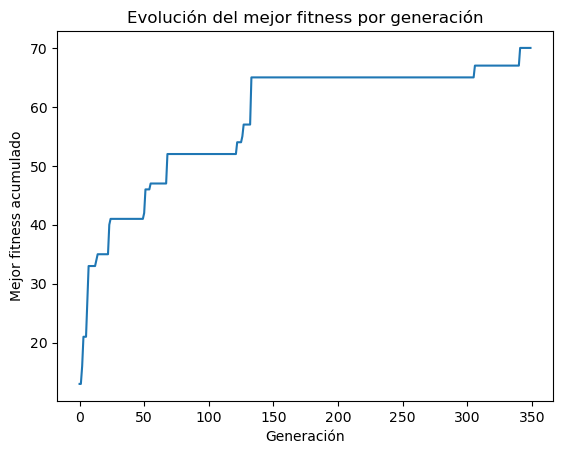

(342,
 70,
 {'Ana': 2,
  'Andres': 3,
  'Belen': 3,
  'Beltran': 2,
  'Bruno': 2,
  'Camila': 3,
  'Carlos': 3,
  'Catalina': 3,
  'Daniela': 3,
  'Dario': 2,
  'Diego': 3,
  'Elena': 3,
  'Emilia': 1,
  'Esteban': 1,
  'Fabian': 1,
  'Fernanda': 1,
  'Francisco': 3,
  'Gabriela': 3,
  'Gisela': 2,
  'Gustavo': 1,
  'Helena': 3,
  'Hernan': 2,
  'Horacio': 3,
  'Hugo': 3,
  'Ignacio': 2,
  'Isabel': 1,
  'Isidoro': 3,
  'Jimena': 2,
  'Juan': 1,
  'Julieta': 2,
  'Karla': 1,
  'Kevin': 2,
  'Laura': 2,
  'Leonardo': 1,
  'Luz': 1,
  'Mariana': 1,
  'Martin': 1,
  'Mateo': 2,
  'Natalia': 3,
  'Nicolas': 1,
  'Octavio': 3,
  'Olivia': 1,
  'Pablo': 1,
  'Paula': 3,
  'Raul': 2,
  'Ricardo': 2,
  'Sabrina': 2,
  'Sofia': 2,
  'Tadeo': 2,
  'Tomas': 2,
  'Ursula': 1,
  'Valeria': 2,
  'Victor': 1,
  'Walter': 3,
  'Wanda': 1,
  'Xavier': 3,
  'Ximena': 1,
  'Yamila': 1,
  'Yara': 3,
  'Zoe': 2},
 [13,
  13,
  16,
  21,
  21,
  21,
  27,
  33,
  33,
  33,
  33,
  33,
  33,
  34,
  35,
  35

In [32]:
algoritmo_genetico(25, 350, 0.01)

---

### Bonus 1

In [33]:
import matplotlib.pyplot as plt

def algoritmo_genetico_elitismo(tamano_poblacion, generaciones, tasa_mutacion):
    poblacion = inicializar_poblacion(tamano_poblacion)
    best_ind = max(poblacion, key=calcular_fitness)
    best_fit = calcular_fitness(best_ind)
    evolucion = []
    best_gen = 0

    for gen in range(1, generaciones + 1):
        nueva = [best_ind.copy()]  # Elitismo: conservar el mejor individuo actual

        while len(nueva) < tamano_poblacion:
            p1 = seleccionar_accept_reject(poblacion)
            p2 = seleccionar_accept_reject(poblacion)
            hijo = crossover(p1, p2)

            if random.random() < tasa_mutacion:
                hijo = mutar(hijo)

            nueva.append(hijo)

        poblacion = nueva

        current_best = max(poblacion, key=calcular_fitness)
        current_fit = calcular_fitness(current_best)

        if current_fit > best_fit:
            best_fit = current_fit
            best_ind = current_best.copy()
            best_gen = gen

        evolucion.append(best_fit)
        print(f"Generación {gen}/{generaciones} - Mejor fitness actual: {current_fit} - Mejor hasta ahora: {best_fit}")

    # Gráfico de evolución
    plt.plot(evolucion)
    plt.xlabel('Generación')
    plt.ylabel('Mejor fitness acumulado')
    plt.title('Evolución del mejor fitness por generación')
    plt.show()

    return best_gen, best_fit, best_ind, evolucion


Generación 1/500 - Mejor fitness actual: 19 - Mejor hasta ahora: 19
Generación 2/500 - Mejor fitness actual: 19 - Mejor hasta ahora: 19
Generación 3/500 - Mejor fitness actual: 19 - Mejor hasta ahora: 19
Generación 4/500 - Mejor fitness actual: 20 - Mejor hasta ahora: 20
Generación 5/500 - Mejor fitness actual: 22 - Mejor hasta ahora: 22
Generación 6/500 - Mejor fitness actual: 22 - Mejor hasta ahora: 22
Generación 7/500 - Mejor fitness actual: 22 - Mejor hasta ahora: 22
Generación 8/500 - Mejor fitness actual: 22 - Mejor hasta ahora: 22
Generación 9/500 - Mejor fitness actual: 22 - Mejor hasta ahora: 22
Generación 10/500 - Mejor fitness actual: 23 - Mejor hasta ahora: 23
Generación 11/500 - Mejor fitness actual: 23 - Mejor hasta ahora: 23
Generación 12/500 - Mejor fitness actual: 23 - Mejor hasta ahora: 23
Generación 13/500 - Mejor fitness actual: 23 - Mejor hasta ahora: 23
Generación 14/500 - Mejor fitness actual: 24 - Mejor hasta ahora: 24
Generación 15/500 - Mejor fitness actual: 2

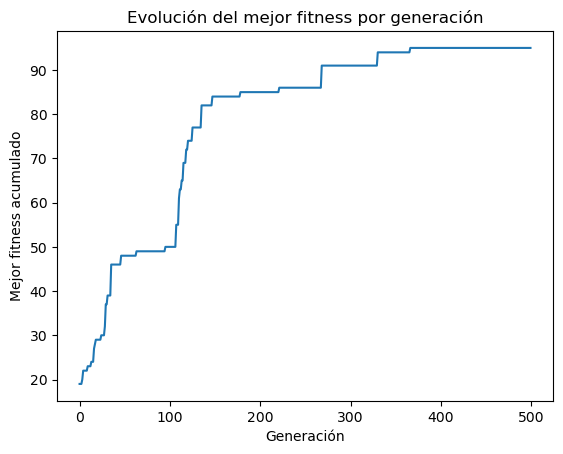

(367,
 95,
 {'Ana': 1,
  'Andres': 3,
  'Belen': 3,
  'Beltran': 1,
  'Bruno': 1,
  'Camila': 1,
  'Carlos': 3,
  'Catalina': 1,
  'Daniela': 3,
  'Dario': 1,
  'Diego': 1,
  'Elena': 1,
  'Emilia': 2,
  'Esteban': 3,
  'Fabian': 2,
  'Fernanda': 3,
  'Francisco': 1,
  'Gabriela': 1,
  'Gisela': 2,
  'Gustavo': 3,
  'Helena': 2,
  'Hernan': 3,
  'Horacio': 3,
  'Hugo': 1,
  'Ignacio': 2,
  'Isabel': 1,
  'Isidoro': 1,
  'Jimena': 3,
  'Juan': 1,
  'Julieta': 2,
  'Karla': 2,
  'Kevin': 2,
  'Laura': 2,
  'Leonardo': 2,
  'Luz': 3,
  'Mariana': 2,
  'Martin': 3,
  'Mateo': 2,
  'Natalia': 2,
  'Nicolas': 2,
  'Octavio': 2,
  'Olivia': 2,
  'Pablo': 2,
  'Paula': 3,
  'Raul': 3,
  'Ricardo': 3,
  'Sabrina': 3,
  'Sofia': 3,
  'Tadeo': 3,
  'Tomas': 3,
  'Ursula': 3,
  'Valeria': 1,
  'Victor': 2,
  'Walter': 1,
  'Wanda': 2,
  'Xavier': 1,
  'Ximena': 2,
  'Yamila': 1,
  'Yara': 1,
  'Zoe': 1},
 [19,
  19,
  19,
  20,
  22,
  22,
  22,
  22,
  22,
  23,
  23,
  23,
  23,
  24,
  24,
  24

In [34]:
algoritmo_genetico_elitismo(25, 500, 0.01)

---

### Bonus 2